# <center> Lecture9 : Simple Normal Regression </center>  
 
## <center> Instructor: Dr. Hu Chuan-Peng </center> 

## Intro: 线性模型  

> ⭐从lec9开始，我们将重点介绍贝叶斯模型和统计分析方法的结合  


在lec9中，我们关注一个简单的线性模型，探究压力(stress)和自我控制(self control)之间的关系

> * 🤦‍♀️🤦‍♀️当你压力大时，或许也曾有过如下冲动：烦躁易怒、暴饮暴食、疯狂购物、沉迷游戏
> * 从直觉上我们能感受到似乎压力与自我控制之间存在某种联系

我们使用的数据来自Human Penguin Project，该项目使用了多种常见的心理测量量表，并在跨国人群中进行施测，其中包含了测量压力与自我控制的量表。

- 测量压力的量表共有14道题，每道题的标尺有5个水平，分值为1-5，总分的分布范围为14-70

- 测量自我控制的量表共有13道题，每道题的标尺有5个水平，分值为1-5，总分的分布范围为13-65

（*数据来源:https://osf.io/h52d3/*）

**使用线性模型表示二者关系**

* 在这个例子中，我们将每个被试的自我控制水平设为$Y$，压力水平设为$X$。在收集完n个被试的数据后，我们可以得到：  

$$  
\left\lbrace (Y_1,X_1), (Y_2,X_2),...,(Y_n,X_n) \right\rbrace  
$$  

* 我们可以使用线性模型来描述$Y$与$X$的关系，常见地，我们会将二者的关系写为：  

$$  
Y_i = \beta_0 + \beta_1 X_i + \epsilon \;\;\;\;\;\;\;\;\epsilon \sim N(0,\sigma^2)\\  
$$  

*($\beta_0$为截距，$\beta_1$为斜率，$\epsilon$为残差)*  

# Normal linear regression  

> ⭐我们也可以换一种方式来表达线性模型  

* < span style = "color: orange;" >预测值</span > $\mu_i$(即直线上橙色的点)可以写为：$\mu_i = \beta_0 + \beta_1 X_i(1)$  

* 从图上可以看到< span style = "color: orange;" >预测值</span >和<span style = "color: gray;" >实际值</span > (即灰色的散点)之间存在出入，实际值会在预测值附近波动  

* 那么实际值可以看作服从以$\mu_i$为均值，标准差为$\sigma$的正态分布，即：$Y_i \sim N(\mu_i, \sigma ^ 2)(2)$  

![Image Name](https://cdn.kesci.com/upload/s3k1vv2eub.png?imageView2/0/w/960/h/960)  

*(改编自：https: // saylordotorg.github.io/text_introductory-statistics/s14-03-modelling-linear-relationships.html)*  

<br><br>  

---

**Normal data model**  

将公式(1)(2)合并起来，则可以将传统的线性模型写成分布的形式：  
  



$$  
\begin{align*}  
Y_i &= \beta_0 + \beta_1 X_i + \epsilon \;\;\;\;\;\;\;\;\epsilon \sim N(0,\sigma^2)\\  
&\Downarrow \\  
Y_i | \beta_0, \beta_1, \sigma &\stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i  .\\  
\end{align*}  
$$  

* 回归模型需满足如下假设：  

    1. 独立观测假设:每个观测值$Y_i$是相互独立的，即一个观测的值不受其他观测的影响  

    2. 线性关系假设: 预测值$\mu_i$和自变量$X_i$之间可以用线性关系来描述，即：$\mu_i = \beta_0 + \beta_1 X_i$  

    3. 方差同质性假设： 在任意自变量的取值下，观测值$Y_i$都会以$\mu_i$为中心，同样的标准差$\sigma$呈正态分布变化（$\sigma$ is consistent）  





## 数据  

通过示例数据，大致理解压力对自我控制的影响

- 我们使用 `pandas` 的 `read_csv` 方法来读取数据 `Data_Sum_HPP_Multi_Site_Share.csv` (数据已经预先存放在和鲸平台中)。  
- 数据包含多个变量，选择我们需要的`stress` 表示压力水平，`scontrol` 表示自我控制水平。  
- 每一行(index)表示一个被试。

In [1]:
import pandas as pd

# 通过 pd.read_csv 加载数据 Data_Sum_HPP_Multi_Site_Share.csv
df = pd.read_csv('/home/mw/input/bayes20238001/Data_Sum_HPP_Multi_Site_Share.csv')

# 选择需要的两列
df = df[["stress","scontrol"]]

#设置索引
df["index"] = range(len(df))
df = df.set_index("index")

# 显示部分数据
df.head()

,stress,scontrol
index,,
0,32,41
1,44,36
2,51,31
3,45,40
4,42,43


进一步可视化数据情况  
* 我们使用 `seaborn` 的 `regplot` 方法来绘制回归图  
* 其中横轴为压力分数 `x="stress"`，纵轴为自我控制分数 `y="scontrol"`。  
* 需要注意的是，`regplot` 方法会同时绘制**数据的散点图**以及**y关于x的回归线条**。

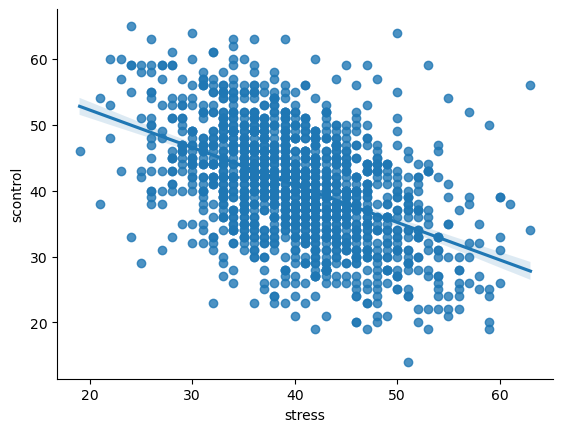

In [2]:
import pandas as pd
import seaborn as sns

# 使用 `regplot`方法可视化数据。data表示传入的数据，x为自变量，y为因变量。
sns.regplot(x="stress", y="scontrol", data=df)
sns.despine()

## 定义先验  

从数据中可知，我们主要关注两个数据变量：自我控制水平$Y$，压力水平$X$  

$$  
Y_i | \beta_0, \beta_1, \sigma \stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i  
$$  

而根据之前的模型公式(数据模型)可发现，存在三个未知的参数$\beta_0，\beta_1，\sigma$  

* 在贝叶斯模型的框架下，我们需要为未知的参数指定先验：  
 
$$  
Y_i \sim N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i  .\\  
$$  

$$  
\beta_0    \sim N\left(m_0, s_0^2 \right)  \\  
\beta_1   \sim N\left(m_1, s_1^2 \right) \\  
\sigma \sim \text{Exp}(l)  
$$  


> * 参数的前提假设(assumptions):  
>    * $\beta_0，\beta_1，\sigma$ 之间相互独立  
> * 此外，规定 $\sigma$ 服从指数分布，以限定其值恒为正数  
> * 其中，$m_0，s_0，m_1，s_1$为超参数  
>    * 我们需要根据我们对$\beta_0$和$\beta_1$的先验理解来选择超参数的范围  
>    * 比如，$\beta_1$反映了压力分数每增加1分，自我控制分数上升的值；$\beta_0$反映了压力分数为0时，自我控制分数的值  


**指定超参数**  

$$  
\begin{equation}  
\begin{array}{lcrl}  
\text{data:} & \hspace{.05in} &   Y_i | \beta_0, \beta_1, \sigma & \stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i \\  

\text{priors:} & & \beta_{0}  & \sim N\left(70, 4^2 \right)  \\  
                    & & \beta_1  & \sim N\left(-1, 0.2^2 \right) \\  
                    & & \sigma   & \sim \text{Exp}(0.6)  .\\  
\end{array}  
\end{equation}  
$$  

这里，我们根据生活经验或直觉对超参数进行了定义：  
- 我们假设 $\beta_1$ 服从正态分布，其均值为-1，标准差为1。 代表了： 

  * (斜率)压力分数每上升1分，自我控制分数下降1分

    * 这个下降的量是变化的，自我控制分数下降的范围大概在-1 ± 0.2  

* 其次，我们假设 $\beta_0$ 服从正态分布，其均值为70，标准差为4。 代表了： 

  * （截距）当压力水平为0时，自我控制水平大概为70；  

  * 那么压力水平 X 为 20，$\beta_1$ 为 -1 时，根据公式 $\mu_i = \beta_0 + \beta_1X_i$，可以预测 $\mu_i$ 为 70 + (-1) * 20 = 50。  

  * 然而，这个值是变化的，$\beta_0$ 大概范围为 70 ± 4。 
   
* 最后，我们假设 $\sigma$ 服从指数分布，其参数为0.6。 从下图可见，其范围在0到6。 

  * 它代表了预测值在$\mu_i$附近波动的范围


* 可视化指定超参下的先验：  

![Image Name](https://cdn.kesci.com/upload/s3nlfgr4u3.png?imageView2/0/w/960/h/960)



### 先验预测检验(prior predictive check)  

🤔有些同学可能认为这个先验的定义过于随意，甚至有些不靠谱。 那我们是否可以检验先验的合理性，以及适当的调整这个先验呐？  

**我们通过代码来说明，如何根据超参来定义回归模型的先验，以及进行先验预测检验**  

首先根据公式定义先验模型：  

$$  
\begin{align*}  
\text{priors:} & & \beta_{0}  & \sim N\left(70, 4^2 \right)  \\  
                    & & \beta_1  & \sim N\left(-1, 0.2^2 \right) \\  
                    & & \sigma   & \sim \text{Exp}(0.6)  .\\  
\end{align*}  
$$

In [22]:
# 导入 pymc 模型包，和 arviz 等分析工具 
import pymc as pm
import arviz as az
import seaborn as sns
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子确保结果可以重复
np.random.seed(84735)

# 忽略不必要的警告
import warnings
warnings.filterwarnings("ignore")

In [23]:
with pm.Model() as linear_model:

    #===========================
    #     定义模型先验
    #===========================
    #定义beta_0：假设其均值为 70，标准差为 4
    beta_0 = pm.Normal("beta_0", mu=70, sigma=4)  
    #定义beta_1：假设其均值为 -1，标准差为 1                  
    beta_1 = pm.Normal("beta_1", mu=-1, sigma=0.2)  
    #定义sigma： 设置其参数为 0.6           
    sigma = pm.Exponential("sigma", 0.6)   

根据数据，定义数据模型：  

$$  
\begin{align*}  
X &= df.stress \\  
\mu_i &= \beta_0 + \beta_1X_i \\  
\hspace{.05in} Y_i | \beta_0, \beta_1, \sigma &\stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \\  
Y &= df.scontrol \\  
\end{align*}  
$$

In [24]:
with linear_model:

    #===========================
    #     定义数据似然模型
    #===========================
    
    # 设置自变量数据，x是我们的自变量压力水平
    x = pm.Data("x",df.stress, mutable=False)                 
    # 定义mu，自变量与先验结合
    mu = beta_0 + beta_1 * x                                    
    #定义似然：预测值y符合N(mu, sigma)分布
    #通过 observed 传入我们收集到的实际数据y=df.scontrol
    likelihood = pm.Normal("y_est", mu=mu, sigma=sigma, 
        observed=df.scontrol)     

### 先验预测检验(Prior Predictive Check)  

我们可以通过**先验预测检验**来初步判断先验的设定是否合理。  

* 1. 在先验中随机抽取200组$\beta_0, \beta_1$值  
* 2. 生成假数据自变量X，  
* 3. 生成200条 $\beta_0 + \beta_1 X$, 观察其中的预测值是否处在合理的范围内

In [84]:
# 1. 在先验中随机抽取200组$\beta_0, \beta_1$值 
with linear_model:
    prior_pred = pm.sample_prior_predictive(samples=200, random_seed=84735)

Sampling: [beta_0, beta_1, sigma, y_est]


**查看先验预测的抽取结果**

1.随机抽取200组先验值

* 结果储存在变量prior中  

* 变量的类型为 xarray，类似于 numpy 的 array。

* 区别在于，xarray 支持多维数组。例如，pymc 返回的结果包括不同的MCMC链chains 和采样draw。 

  * 这样，我们可以更容易的提取某一条指定MCMC链中的某些采样。  

* 为了方便查看，我们也可以使用 .to_dataframe() 将其转化为 pandas DataFrame。 
 
  * 可以看到，该数据框包含三个变量：beta_0, beta_1, sigma。并且包含两个索引：chain 和 draw。

In [26]:
# 查看先验预测的抽取结果，可以发现结果储存在prior中
prior_pred.prior

<xarray.Dataset>
Dimensions:  (chain: 1, draw: 200)
Coordinates:
  * chain    (chain) int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 192 193 194 195 196 197 198 199
Data variables:
    beta_1   (chain, draw) float64 -1.18 -0.9399 -1.164 ... -1.194 -1.052
    sigma    (chain, draw) float64 0.1696 0.8395 1.81 ... 0.6993 0.5014 0.05903
    beta_0   (chain, draw) float64 63.25 72.59 68.3 68.82 ... 68.07 71.71 71.45
Attributes:
    created_at:                 2023-11-05T13:46:41.381858
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.4.1

In [27]:
prior_pred.prior.to_dataframe()

beta_1     sigma     beta_0
chain draw                               
0     0    -1.180063  0.169606  63.246418
      1    -0.939873  0.839549  72.589373
      2    -1.163931  1.810087  68.297771
      3    -1.407615  1.130973  68.823792
      4    -0.729109  4.595520  66.767238
...              ...       ...        ...
      195  -0.797627  1.193724  64.094765
      196  -0.630710  1.349791  76.321054
      197  -0.890274  0.699259  68.074763
      198  -1.194048  0.501370  71.706783
      199  -1.051548  0.059030  71.453674

[200 rows x 3 columns]

**可视化先验参数分布**

同样，我们可以可视化 先验采样得到的参数分布。

- 可见 $\beta_1$ 的范围大致在 -1.2到 -0.6  

- 而 $\beta_0$ 的范围大致在 62到 76  

- $\sigma$ 的范围大致在 0到 4 

要理解每个参数范围的含义，我们需要将这些参数带入回归方程中。

array([[<Axes: title={'center': 'beta_1'}>,
        <Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'beta_0'}>]], dtype=object)

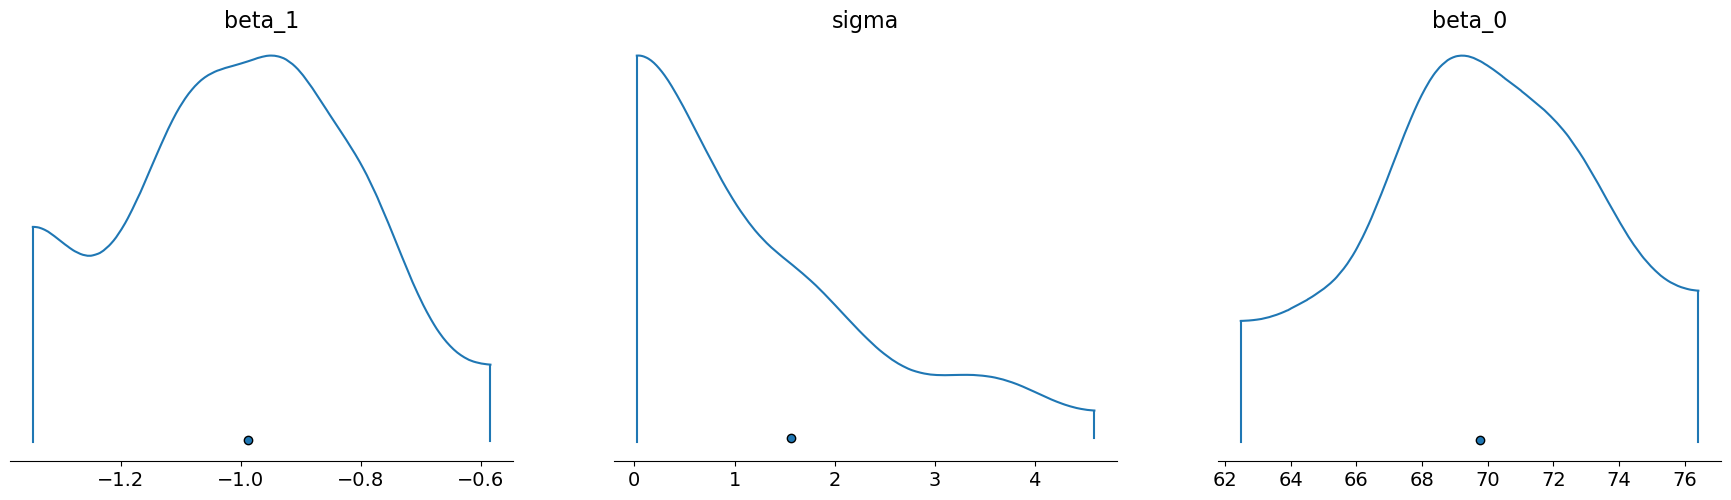

In [28]:
az.plot_density(prior_pred, group = "prior")

2. 生成假数据自变量X  
   
- 这里我们根据现实情况来定义X的取值范围  

    - 根据量表的结构，压力分数的范围为14-70  

- 我们使用 `np.arange`设置压力分数  


In [85]:
# 通过np.arange设置压力分数，从 14,15...70。
x_sim = np.arange(start=14,stop=71,step=1)

x_sim

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70])

3. 根据公式 $\mu = \beta_0 + \beta_1 X$ 生成200条回归线, 观察其中的$\mu$是否处在合理的范围内  

- 我们有200次采样，每次采样都有三个参数 beta_0, beta_1, sigma。

- 结合每次采样的结果，和自变量X，我们可以生成一条直线

- 重复这个过程200次，我们就能生成200条直线 

> **我们通过代码来理解一次采样的过程**

![Image Name](https://cdn.kesci.com/upload/s3olc38leb.png?imageView2/0/w/960/h/960)



In [86]:
# 获取第一条MCMC链的第一组采样参数
chain_i = 0  # 选取第一条MCMC链
draw_i = 0   # 选取第一次采样的参数结果
beta_0 = prior_pred.prior["beta_0"][chain_i][draw_i].values
beta_1 = prior_pred.prior["beta_1"][chain_i][draw_i].values

print(f"获取第一条MCMC链的第一组采样参数值，beta_0:{beta_0:.2f}, beta_1:{beta_1:.2f}")

获取第一条MCMC链的第一组采样参数值，beta_0:63.25, beta_1:-1.18


🎯练习：  

根据获取的第一条MCMC链的第一组采样参数，结合自变量X的范围，预测 $\mu$ 的值。  

1. 根据回归公式 $\mu = \beta_0 + \beta_1 X$ 预测$\mu$ 的值。  
2. 绘制回归线条。

In [ ]:
#===========================
#     根据回归公式 $\mu = \beta_0 + \beta_1 X$ 预测$\mu$ 的值。
#     已知：X （x_sim） 的范围为14-71
#===========================
x_sim = np.arange(start=14,stop=71,step=1)
mu = ...
print("预测值",mu)

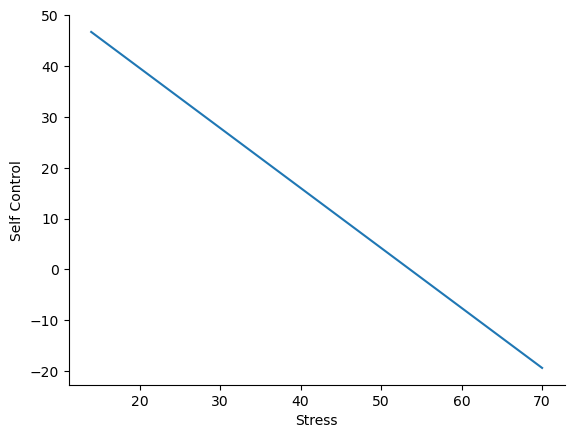

In [91]:
#===========================
#     绘制回归线，请设置x轴和y轴的变量
#===========================
x_axis = ...
y_axis = ...
plt.plot(x_axis,y_axis)
plt.xlabel("Stress")
plt.ylabel("Self Control")
sns.despine()

在了解对单次采样的预测后，我们对200次采样进行同样的分析  

* 这里的代码有两个注意点

1. 我们不使用循环，而直接对所有采样进行线性运算。
    - 组合一次采样结果生成了57个预测值(因为自变量X有57个值)

    - 组合200次采样结果生成 57*200个预测值  


2. 我们通过 xr.DataArray将 x_sim 转化为 xarray，方便使用 X 进行后续计算
    - 因为采样时，pymc 返回的数据为`prior_pred.prior` 为InferenceData，其基于 xarray 而不是 numpy。

    - 其索引包含**chain**(链数，这里为1), **draw**(采样数，这里为200), **dim_0**（单次采样结果，每个参数每次只采了1个值）
    
    - 最后的结果仍然包含这三个索引，但注意此时单次采样结果dim0中包含了57个值 

In [30]:
import xarray as xr
# 用 xr.DataArray将 x_sim 转化为 xarray，是为了匹配数据类型
x_sim = xr.DataArray(x_sim) 

#先验抽取的结果存储在prior_pred.prior中，将其提取出来，并代入公式
y_sim = prior_pred.prior["beta_0"] + prior_pred.prior["beta_1"] * x_sim

y_sim.to_dataframe(name="scontrol")

scontrol
chain draw dim_0           
0     0    0      46.725534
           1      45.545471
           2      44.365408
           3      43.185345
           4      42.005282
...                     ...
      199  52      2.051505
           53      0.999957
           54     -0.051591
           55     -1.103139
           56     -2.154687

[11400 rows x 1 columns]

**可视化先验预测结果**  

- 每一条线代表一次抽样生成的预测，因此我们绘制了200条线。  

- 我们可以观测到自我控制水平(纵坐标)的范围随着压力(横坐标)的变化。

- 自我控制水平的范围大概为(-20~60)，尚且是可接受的  

> * 因为我们提供了一个**弱信息**的先验，所以自我控制水平出现了负数。  
> * 但当我们提供数据时，这个范围会更接近真实，因此我们不必过于担心自我控制分数真的为负数😜。  
> * 相反，如果我们设置一个强信息先验，那么先验预测的结果可能更符合现实，但当数据加入模型时，模型可能并不能反映真实的数据。

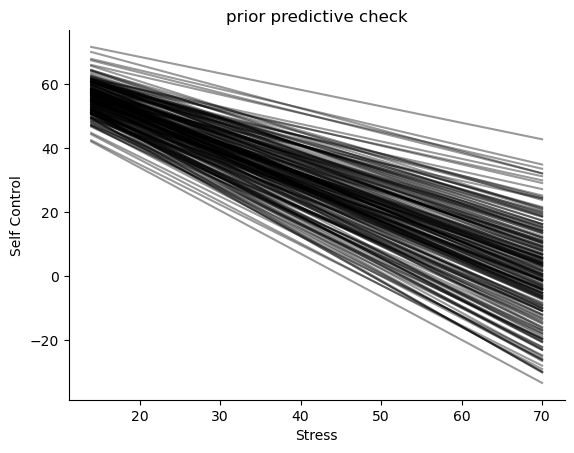

In [31]:
# 为了画图时反应所有链合并的结果，将y_sim的chain和draw融合到一起
y_sim_re = y_sim.stack(sample=("chain", "draw"))

plt.plot(x_sim, y_sim_re, c="k", alpha=0.4)
plt.title("prior predictive check")
plt.xlabel("Stress")
plt.ylabel("Self Control")
sns.despine()

## 后验分布  

### 模型定义  

现在，我们可以结合数据与先验，为参数$(\beta_0, \beta_1, \sigma)$生成后验模型  

* 在lec7中我们已经知道，当后验分布过于复杂时，可以使用MCMC来近似后验分布  

    * 我们使用pymc来完成采样过程  


在这之前，我们回顾之前对先验与似然的定义：  

* > $Y_i {\sim} N\left(\mu_i, \sigma^2\right)$  

* > $\beta_{0}   \sim N\left(70, 4^2 \right)$  

* > $\beta_1   \sim N\left(-1, 0.2^2 \right)$  

* > $\mu_i = \beta_0 + \beta_1X_i$  

* > $\sigma   \sim \text{Exp}(0.6)$  


In [60]:
with pm.Model() as linear_model:

    beta_0 = pm.Normal("beta_0", mu=70, sigma=4)          #定义beta_0          
    beta_1 = pm.Normal("beta_1", mu=-1, sigma=0.2)              #定义beta_1
    sigma = pm.Exponential("sigma", 0.6)                     #定义sigma

    x = pm.Data("x",df.stress, mutable=False)                 #x是自变量压力水平

    mu = beta_0 + beta_1 * x                                    #定义mu，讲自变量与先验结合

    likelihood = pm.Normal("y_est", mu=mu, sigma=sigma, observed=df.scontrol)     #定义似然：预测值y符合N(mu, sigma)分布
                                                                                #通过 observed 传入实际数据y 自我控制水平

### 后验模拟  

1. 接下来我们使用`pm.sample()`进行mcmc采样  

* 我们指定了4条马尔科夫链，保留的采样数为5000，对于每一个参数，在每条链上都有5000个采样结果  

    * $\left\lbrace \beta_0^{(1)}, \beta_0^{(2)}, \ldots, \beta_0^{(5000)} \right\rbrace$  

    * $\left\lbrace \beta_1^{(1)}, \beta_1^{(2)}, \ldots, \beta_1^{(5000)} \right\rbrace$  
    
    * $\left\lbrace \sigma_1^{(1)}, \sigma_1^{(2)}, \ldots, \sigma_1^{(5000)} \right\rbrace$  


In [74]:
#===========================
#     注意！！！以下代码可能需要运行3分钟左右
#===========================
with linear_model:
    trace = pm.sample(draws=5000,                   # 使用mcmc方法进行采样，draws为采样次数
                      tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                      chains=4,                     # 链数
                      discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                      random_seed=84735)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1, sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 106 seconds.


2. 在采样结束之后，我们得到采样样本 trace  

- 后验样本在`trace.posterior`中，它的数据类型为之前介绍的 xarray。  

  - 包括了两个维度(索引)，第一个维度为链chain，第二个维度为采样draw  

  - 我们可以使用 trace.posterior['beta_0']提取后验中的$\beta_0$参数  
  
  - 我们可以使用 trace.posterior['beta_0'][0, 10]提取$\beta_0$第一条链中第10个采样值

In [75]:
trace.posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 5000)
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4 5 6 7 ... 4993 4994 4995 4996 4997 4998 4999
Data variables:
    beta_0   (chain, draw) float64 66.92 66.13 65.73 65.11 ... 63.89 63.02 64.73
    beta_1   (chain, draw) float64 -0.6541 -0.6293 -0.6221 ... -0.5601 -0.594
    sigma    (chain, draw) float64 7.341 7.487 6.964 7.29 ... 7.525 7.308 7.108
Attributes:
    created_at:                 2023-11-06T02:34:19.008441
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.4.1
    sampling_time:              105.92901539802551
    tuning_steps:               1000

In [76]:
trace.posterior['beta_0']

<xarray.DataArray 'beta_0' (chain: 4, draw: 5000)>
array([[66.91895099, 66.12528037, 65.72853315, ..., 65.40031417,
        64.89930519, 64.47640034],
       [64.69563633, 65.15789246, 66.22129427, ..., 65.19152958,
        64.61297276, 64.8286883 ],
       [63.3091725 , 64.23140397, 64.1106577 , ..., 63.36114822,
        63.92919854, 63.69994213],
       [64.54735903, 64.41918888, 65.95569355, ..., 63.88686158,
        63.01659902, 64.72516272]])
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4 5 6 7 ... 4993 4994 4995 4996 4997 4998 4999

In [77]:
trace.posterior['beta_0'][0, 10]

<xarray.DataArray 'beta_0' ()>
array(62.97376356)
Coordinates:
    chain    int32 0
    draw     int32 10

使用`az.plot_trace()`可视化参数的后验分布

array([[<Axes: title={'center': 'beta_0'}>,
        <Axes: title={'center': 'beta_0'}>],
       [<Axes: title={'center': 'beta_1'}>,
        <Axes: title={'center': 'beta_1'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

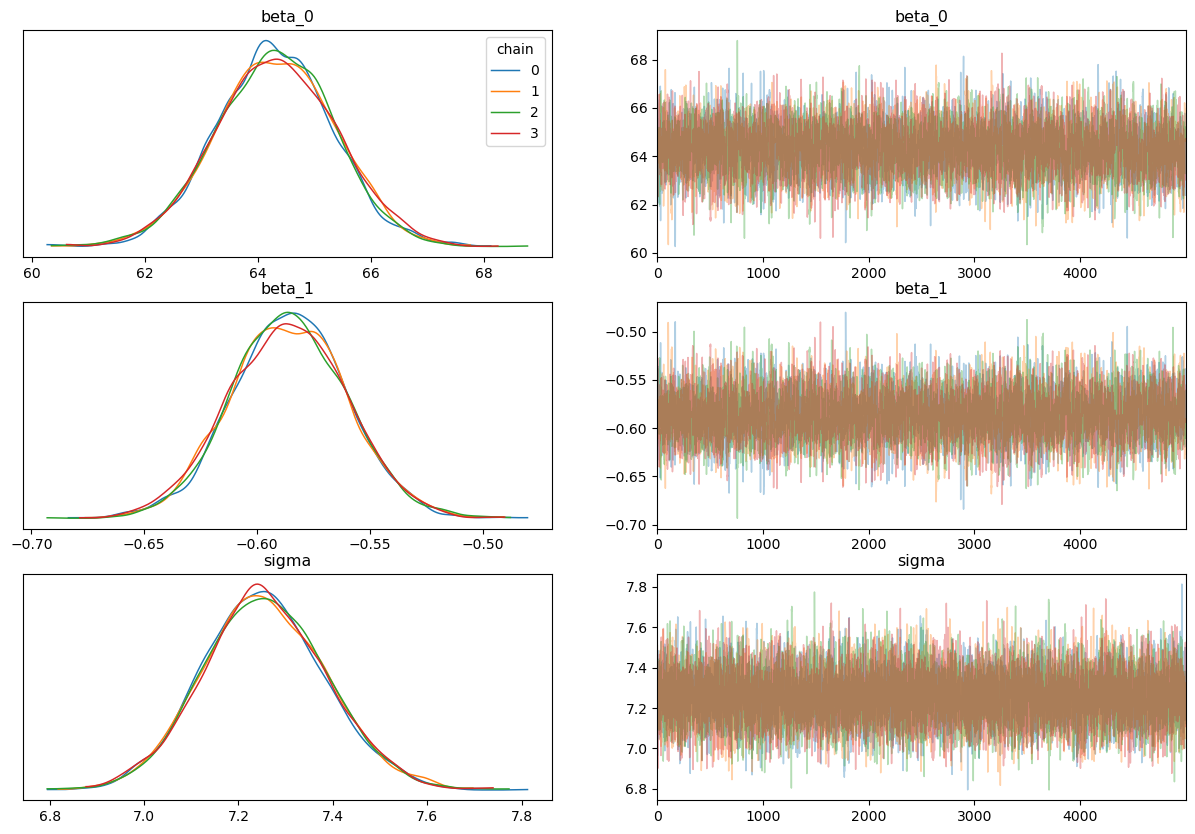

In [78]:
az.plot_trace(trace, figsize=(15,10),compact=False,legend=True)

## 解释后验  

我们共得到20000对$\beta_0$和$\beta_1$值，可以通过`az.summary()`总结参数的基本信息  

- 这其中包括了对于模型的诊断信息 ess_bulk 和 r_hat (当然你可以结合可视化进行诊断)。 
 
- 同时该结果也包含了参数的均值和HDI。

In [79]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,64.313,1.042,62.316,66.236,0.014,0.010,5725.0,7134.0,1.0
beta_1,-0.586,0.026,-0.634,-0.537,0.000,0.000,5748.0,7059.0,1.0
sigma,7.255,0.130,7.023,7.517,0.001,0.001,10541.0,9734.0,1.0


* 我们可以使用均值来理解生成的后验分布，通过上表我们知道  

	*  $\beta_0$= 64.31 *(压力水平为0时的自我控制水平，意义不大在此不考虑)*

	*  $\beta_1$ = -0.59

	*  我们可以将其解释为，压力水平每增加1分，自我控制水平下降0.59分  

* 但从上表我们也知道参数的后验分布存在不确定性，参数均值生成的回归线只是其中之一  

	* 那么我们可以通过20000对参数值，生成20000条回归线

### 练习

根据 **先验预测检验可视化预测结果**的思路，对于后验预测结果进行可视化。  

1. 使用真实数据中的自变量df.stress  
2. 根据 20000对参数，与自变量进行组合，生成了20000条回归线  
3. 绘制后验预测结果  

*(代码需运行3分钟左右)*

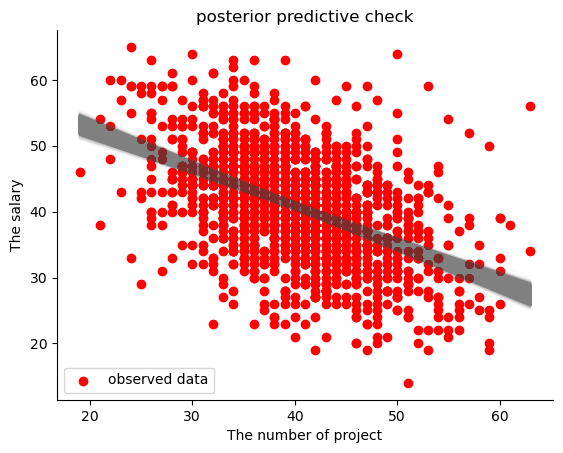

In [39]:
# 导入真实数据中的自变量
x_value = xr.DataArray(...)

##---------------------------------------------------------------------------
#      20000对参数与自变量进行组合，生成了20000条回归线
#      提示：基本公式为 y_model = beta_0 + beta_1 * x
#      提示：但需要对参数的表达进行修改
#           如：beta_0 = trace.posterior["beta_0"]
#---------------------------------------------------------------------------
y_model = ...


## 为了画图时反应所有链合并的结果，将y_sim的chain和draw融合到一起
y_sim_re = y_model.stack(sample=("chain", "draw"))

# 绘制回归线条
plt.plot(x_value, y_sim_re, c="gray", alpha=0.01)

# 绘制真实数据的散点图
plt.scatter(trace.constant_data.x,trace.observed_data.y_est,c="r", label="observed data")

# 设置标题等
plt.title("posterior predictive check")
plt.xlabel("Stress")
plt.ylabel("Self control")
plt.legend()
sns.despine()

**使用`plot_lm` 绘制后验预测的线性模型**

**代码详解**

- 与上一段代码最大的不同之处在于，此时需要将`y_model` 存入`trace`中

- 在`az.plot_lm`中:
    - `y` 为真实数据中的因变量`df.scontrol`
    - `x` 为真实数据中的自变量`df.stress`  
    - `y_model` 为结合后验采样生成的预测值
    （在图中表示为黄色和灰色的回归线）

> 😎*跑起来快很多*

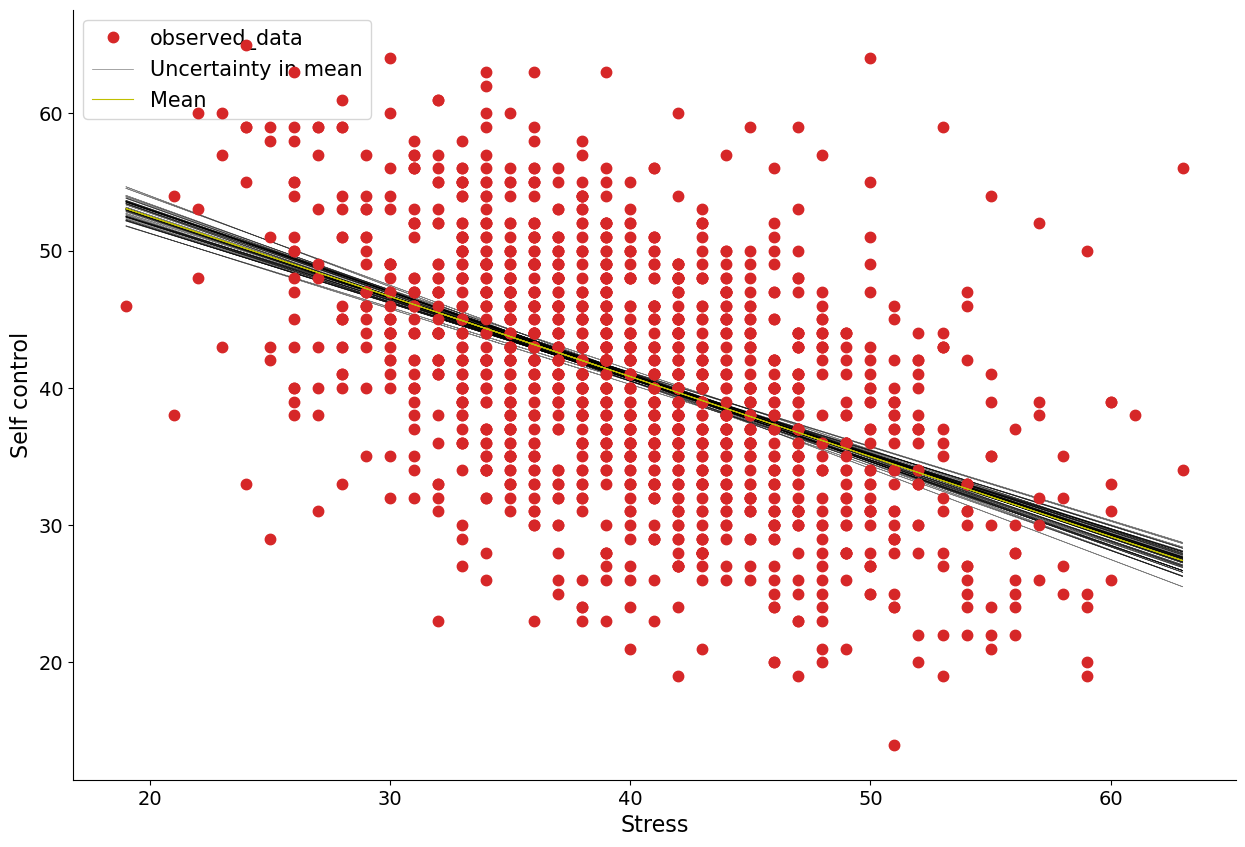

In [65]:
# 导入真实的自变量
x_value = xr.DataArray(df.stress)

# 20000对参数与自变量进行组合，生成了20000条回归线
trace.posterior["y_model"] = trace.posterior["beta_0"] + trace.posterior["beta_1"] * x_value

#绘制实际数据分布，与回归线结果
az.plot_lm(
           y= df.scontrol,
           x= df.stress,
           y_model = trace.posterior["y_model"],
           figsize=(15,10),
           textsize=15,
           grid=False)

# 设置坐标轴标题、字体大小
plt.xlabel('Stress', fontsize=16)  
plt.ylabel('Self control', fontsize=16)  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
sns.despine()

## 后验预测分布  

> 回归模型的参数除了可以帮助我们理解自变量与因变量的关系，还可以帮助我们做出预测  

❓预测问题如：小a的压力水平为35，则小a的自我控制分数可能是多少  

* 若我们以参数的后验均值($\beta_0 = 64.33$, $\beta_1=-0.59$ )进行预测  

$$  
64.33+ 35 * -0.59 =  43.68 
$$  

* 但在lec8中我们知道后验预测中存在 采样变异和参数变异  

    * 在这个例子中，采样变异指的是压力水平为35的被试并不总是有着同样的自我控制水平  
    
    * 而参数变异指的是，后验分布并没有指定唯一的参数  

* 在lec8中，我们知道，可以通过遍历所有参数组合下，所有事件发生可能性的求和平均来生成后验预测分布  
$$  
f\left(y_{\text{new}} | \vec{y}\right) = \int\int\int f\left(y_{new} | \beta_0,\beta_1,\sigma\right) f(\beta_0,\beta_1,\sigma|\vec{y}) d\beta_0 d\beta_1 d\sigma .  
$$  

😥但这也太抽象了...  


### 通过MCMC采样值理解后验预测分布  


* 通过MCMC采样，三个参数各获得了20000个采样值$\left(\beta_0^{(i)},\beta_1^{(i)},\sigma^{(i)}\right)$  

* 当X = 35时，每一组参数值都可以指定一个预测值$Y$可能符合的正态分布，我们可以从该正态分布中抽取一个预测值$Y_{new}$  

>    以i = 1 和 i = 2 的情况为例  

$$  
Y_{\text{new}}^{(i)} | \; \sim \; N\left(\mu^{(i)}, \left(\sigma^{(i)}\right)^2\right) \;\; \text{ with } \;\; \mu^{(i)} = \beta_0^{(i)} + \beta_1^{(i)} \cdot 35.  
$$  

![Image Name](https://cdn.kesci.com/upload/s3oiiuefkb.png?imageView2/0/w/960/h/960)


**使用代码模拟单次后验预测**  

* 我们有20000组参数值，就能得到20000个预测值$Y$可能符合的正态分布，并抽取出20000个预测值$Y_{new}$  

* 这20000个预测值$Y_{new}$就构成了X = 35时，$Y$的后验预测分布  

$$  
\left[  
\begin{array}{lll}  
\beta_0^{(1)} & \beta_1^{(1)} & \sigma^{(1)} \\  
\beta_0^{(2)} & \beta_1^{(2)} & \sigma^{(2)} \\  
\vdots & \vdots & \vdots \\  
\beta_0^{(20000)} & \beta_1^{(20000)} & \sigma^{(20000)} \\  
\end{array}  
\right]  
\;\; \longrightarrow \;\;  
\left[  
\begin{array}{l}  
Y_{\text{new}}^{(1)} \\  
Y_{\text{new}}^{(2)} \\  
\vdots \\  
Y_{\text{new}}^{(20000)} \\  
\end{array}  
\right]  
$$  

* 我们先用代码来模拟单次完整的抽取过程

In [80]:
# 采样得到的参数后验分布都储存在 trace.posterior中，我们进行一些提取操作
pos_sample = trace.posterior.stack(sample=("chain", "draw"))

# 将每个参数的20000次采样结果存储在数据框中
df_pos_sample = pd.DataFrame({"beta_0": pos_sample["beta_0"].values,
                              "beta_1": pos_sample["beta_1"].values,
                              "sigma": pos_sample["sigma"].values})

# 查看参数
df_pos_sample

,beta_0,beta_1,sigma
0,66.918951,-0.654147,7.341118
1,66.125280,-0.629339,7.486988
2,65.728533,-0.622138,6.963609
3,65.111143,-0.606784,7.290216
4,65.051461,-0.607840,7.167414
...,...,...,...
19995,63.607650,-0.566502,7.331760
19996,63.847596,-0.575460,7.509538
19997,63.886862,-0.578127,7.525110
19998,63.016599,-0.560094,7.307864


In [42]:
# 抽取第一组参数组合，生成正态分布的均值
row_i = 0  # 抽取第一行
X_i = 35   # 假设压力分数为 35
mu_i = df_pos_sample.beta_0[row_i] + df_pos_sample.beta_1[row_i] * X_i           
sigma_i = df_pos_sample.sigma[row_i]

# 从正态分布中随机抽取一个值，作为预测值
prediction_i = np.random.normal(
                                loc = mu_i,                                            
                                scale= sigma_i, 
                                size=1)

# 你可以运行该代码块多次，比较在相同参数下，预测值的变化(感受采样变异)。
print(f"mu_i: {mu_i:.2f}, 预测值：{prediction_i[0]:.2f}")

mu_i: 44.02, 预测值：38.13


**使用代码模拟多次后验预测**  

* 通过上述四行代码，我们已经进行了一次完整的后验预测  

* 我们可以写一个循环，重复这个过程20000次  

* 最后的结果中，每一行代表一个参数对；mu 为预测的均值，y_new 为实际生成的预测值。

In [81]:
# 生成两个空列，用来储存每一次生成的均值mu，和每一次抽取的预测值y_new
df_pos_sample['mu'] = np.nan
df_pos_sample['y_new'] = np.nan

# 将之前的操作重复20000次
for row_i in range(len(df_pos_sample)):
    mu_i = df_pos_sample.beta_0[row_i] + df_pos_sample.beta_1[row_i] * 35
    df_pos_sample["mu"][row_i] = mu_i
    df_pos_sample["y_new"][row_i] = np.random.normal(loc = mu_i,
                                            scale= df_pos_sample.sigma[row_i],
                                            size=1)

In [82]:
df_pos_sample

,beta_0,beta_1,sigma,mu,y_new
0,66.918951,-0.654147,7.341118,44.023813,48.356903
1,66.125280,-0.629339,7.486988,44.098429,39.090253
2,65.728533,-0.622138,6.963609,43.953698,40.492133
3,65.111143,-0.606784,7.290216,43.873709,58.372419
4,65.051461,-0.607840,7.167414,43.777068,43.911803
...,...,...,...,...,...
19995,63.607650,-0.566502,7.331760,43.780091,48.319670
19996,63.847596,-0.575460,7.509538,43.706485,57.081400
19997,63.886862,-0.578127,7.525110,43.652411,46.534185
19998,63.016599,-0.560094,7.307864,43.413293,46.718918


**绘制后验预测分布**  

根据刚刚生成的数据，我们可以分别绘制出 $\mu$ 与 $Y_{new}$ 的后验预测分布图

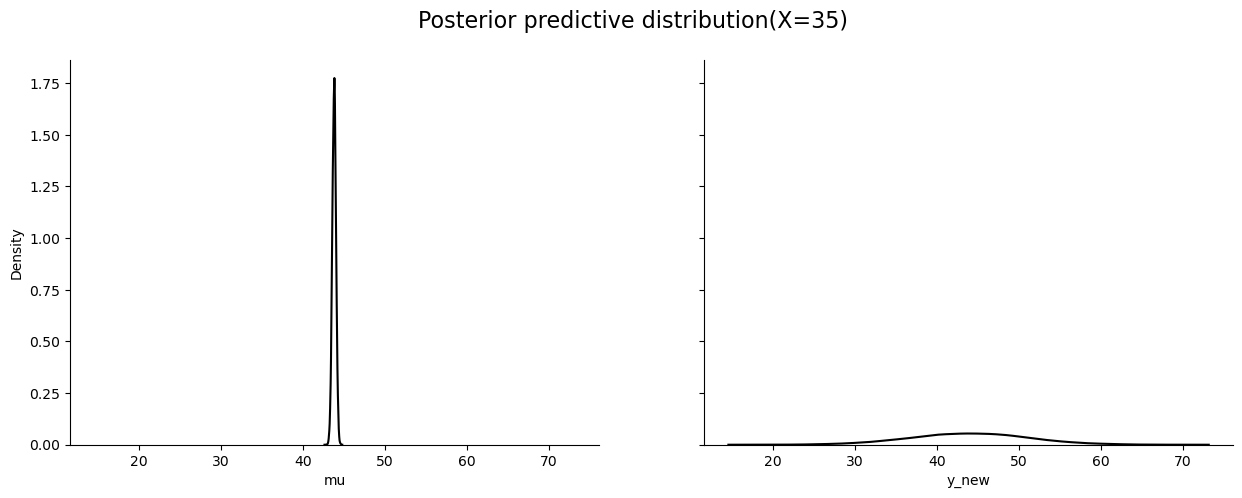

In [83]:
#新建画布
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)        

#在第一个画布中绘制出生成的mu的分布
sns.kdeplot(data=df_pos_sample,                                                
            x="mu", 
            color="black",
            ax=axs[0])

#在第二个画布中绘制出生成的y_new的分布
sns.kdeplot(data=df_pos_sample,                                                 
            x="y_new", 
            color="black",
            ax=axs[1])

fig.suptitle('Posterior predictive distribution(X=35)', fontsize=16)
sns.despine()

从上图可以看到， $Y_{new}$ 分布的不确定性远大于 $\mu$ 分布的不确定性  

同样可以画出二者95%的可信区间  


![Image Name](https://cdn.kesci.com/upload/s3ohqc9jri.png?imageView2/0/w/960/h/960)

### 使用pymc生成后验预测分布  

通过 `pymc.sample_posterior_predictive`方法可以快速从模型生成后验预测数据。

In [70]:
with linear_model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)

Sampling: [y_est]


接着，我们可以使用 arviz 提供的后验预测检查函数 `plot_ppc`来绘制结果。

- 黑色线条代表观测值(自我控制分数)总体的分布情况。  

- 蓝色线代表每一对采样参数对应的后验预测的分布情况。  

- 橙色为后验预测的均值的分布情况

<Axes: xlabel='y_est / y_est'>

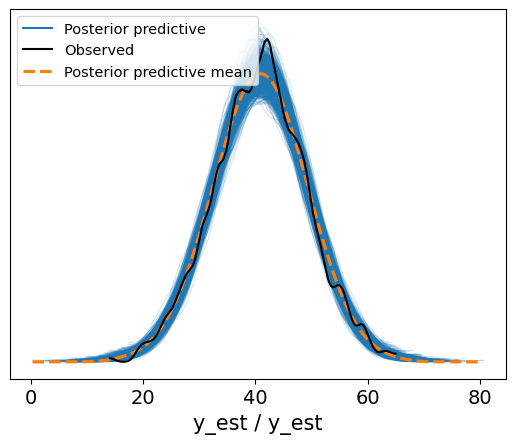

In [71]:
az.plot_ppc(trace, num_pp_samples=1000)

## 使用bambi进行模型定义  

Bambi 是一个用于贝叶斯统计建模的 Python 包，建立在 PyMC 上。  

```pyhon  
model = bmb.Model('scontrol ~ stress',  
                  data=df,  
                  dropna=True)  
```

* 它提供了一个更加简化的界面，使得使用贝叶斯统计模型更加容易，特别是在处理线性和广义线性混合模型时。  

* 上面的代码提供了一个示例，我们可以简单的三行代码来完成之前的回归模型的定义。  

* 其中，我们可以通过 lme4 的形式来表达线性关系：`'scontrol ~ stress'`。~左边是因变量，右边是自变量。例如还有其他变量(如addiction)可以扩展写为`''scontrol ~ stress' + addiction'`。 
 
* 需要注意的是，在bambi中，如果我们不对先验进行定义，它会自动选择一个比较弱(weakly informative)的先验。

我们通过代码示例来说明如何通过 bambi 复现之前的分析：  

1. 首先定义模型

In [72]:
import bambi as bmb

#定义先验并传入模型中
intercept_prior = bmb.Prior("Normal", mu=70, sigma=4)     #对应beta_0
stress_prior = bmb.Prior("Normal", mu=-1, sigma=0.2)          #对应beta_1
sigma_prior = bmb.Prior("Exponential", lam = 0.6)            #对应sigma

# 将三个参数的先验定义在字典prior中
priors = {"Intercept": intercept_prior, 
          "stress": stress_prior,
          "sigma": sigma_prior}

#定义关系式，传入数据
model = bmb.Model('scontrol ~ stress', 
                  data=df,
                  priors=priors,
                  dropna=True)
#总结对模型的设置
model

       Formula: scontrol ~ stress
        Family: gaussian
          Link: mu = identity
  Observations: 1523
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 70.0, sigma: 4.0)
            stress ~ Normal(mu: -1.0, sigma: 0.2)
        
        Auxiliary parameters
            sigma ~ Exponential(lam: 0.6)

2. 拟合模型，使用MCMC方法采样得到后验的近似分布  

- 提示：`model.fit` 基于 `pm.sample` 方法。因此，他们的参数设置是相同可继承的。

In [50]:
#===========================
#      MCMC采样过程
#      注意！！！以下代码可能需要运行几分钟
#===========================
trace = model.fit(draws=4000,                   # 使用mcmc方法进行采样，draws为采样次数
                  tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                  chains=4,
                  random_seed=84735)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [scontrol_sigma, Intercept, stress]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 85 seconds.


模型诊断部分的分析和之前直接使用 pymc 是一致的。

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'stress'}>,
        <Axes: title={'center': 'stress'}>],
       [<Axes: title={'center': 'scontrol_sigma'}>,
        <Axes: title={'center': 'scontrol_sigma'}>]], dtype=object)

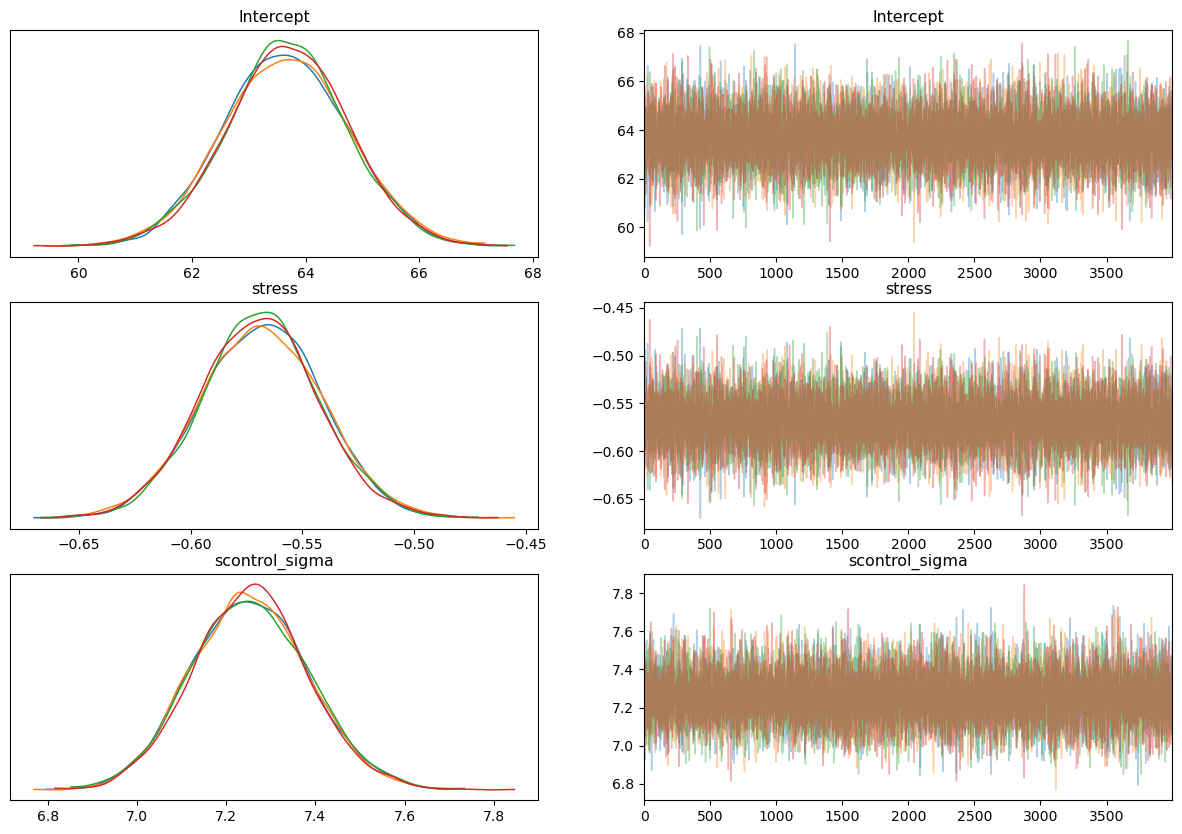

In [51]:
az.plot_trace(trace, figsize=(15,10), compact=False)

In [52]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,63.668,1.081,61.572,65.655,0.007,0.005,24028.0,12563.0,1.0
stress,-0.569,0.027,-0.620,-0.520,0.000,0.000,23867.0,12939.0,1.0
scontrol_sigma,7.253,0.131,7.012,7.504,0.001,0.001,25033.0,12830.0,1.0


## 补充材料：为什么使用MCMC是必要的  

>我们都知道当后验分布的计算过于复杂时，我们应该选用MCMC来近似后验分布  

>但是在这里后验分布究竟有多复杂呢，这里提供了直接的计算(or提供一些复杂的公式让人知难而退)：  

1. 该线性模型存在三个参数值$(\beta_0, \beta_1, \sigma)$  
	* 那么先验概率则为三者pdf的乘积：  
$$  
 f(\beta_0, \beta_1, \sigma) = f(\beta_0) f(\beta_1) f(\sigma)  
$$  

2. 观测到的数据可以用$\vec{y} = (y_1,y_2,...,y_{n})$来表示  
	* 那么似然函数可以表示为：  
$$  
 L(\beta_0, \beta_1, \sigma | \vec{y}) = f(\vec{y}|\beta_0, \beta_1, \sigma) = \prod_{i=1}^{n}f(y_i|\beta_0, \beta_1, \sigma)  
 $$  

3. 后验分布则可以表示为：  
$$  
\begin{split}  
f(\beta_0,\beta_1,\sigma \; | \; \vec{y})  
 & = \frac{\text{prior} \cdot \text{likelihood}}{ \int \text{prior} \cdot \text{likelihood}} \\  
 & = \frac{f(\beta_0) f(\beta_1) f(\sigma) \cdot \left[\prod_{i=1}^{n}f(y_i|\beta_0, \beta_1, \sigma) \right]}  
 {\int\int\int f(\beta_0) f(\beta_1) f(\sigma) \cdot \left[\prod_{i=1}^{n}f(y_i|\beta_0, \beta_1, \sigma) \right] d\beta_0 d\beta_1 d\sigma} \\  
 \end{split}  
 $$  


## 总结  

* 本节课通过一个简单的例子展示了如何使用 pymc 来建立线性回归模型，并结合之前课程的内容对模型结果进行了分析。  
  * 特别是如何进行先验和后验预测的检验。  
* 此外，我们介绍了如何使用 bambi 来简化线性模型的定义和拟合。  
* 最后，我们强调了 MCMC 方法近似后验分布的重要性。